# LEAP AI/ML Workshop 1 - Introduction to Python Data Science Tools in Jupyter
Welcome to the Jupyter notebook for LEAP AI/ML Workshop 1.

We will walk through the following steps during the workshop:
* Understand Jupyter notebook basics
* Read csv data into a pandas dataframe
* Inspect the dataframe with pandas and matplotlib
* Cleanse the data so that it works better for the regression algorithms
* Run a simple AI model to predict the price of a car based on its attributes
 * More to follow about these predictions in Workshop 2...

****

In [1]:
# CODE CELL
# Jupyter notebooks run Python code in cells
n = 0
while (n < 4):
    print ("Hello Jupyter", n)
    n = n+1
    
# From the menu above, select Cell > Run Cell to see the output below

Hello Jupyter 0
Hello Jupyter 1
Hello Jupyter 2
Hello Jupyter 3


# Markdown Cell
You can change the cell type to Markdown by click on the dropdown in the tool bar.

Markdown supports different formatting
# Heading 1
## Heading 2

* Bullet List Item 1
* Bullet List Item 2
 * Nested List Item


See also [Markdown for Jupyter notebooks cheatsheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) link.

***

## Reading CSV data into a pandas dataframe
See these links for documentation of the pandas methods:
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [2]:
# Import the python libraries required for this example
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load the automobiles dataset into a pandas dataframe - note that you might have to edit the path to specific the
automobiles=pd.read_csv("./automobiles.csv")

In [4]:
# Call DataFrame.head() method to print the first n rows - n defaults to 5
automobiles.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Luxury Vehicle
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Luxury
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Luxury
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Luxury
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,Luxury
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,Ordinary


Symbolling
:Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

Normalized-losses:
Related to average loss payment per insured vehicle year.This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.



## Inspecting the dataframe with pandas and matplotlib
Let's inspect the dataframe a bit more using code.

For more info on the API's, see
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html


In [5]:
# List the columns in the dataframe
automobiles.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'Luxury Vehicle'],
      dtype='object')

In [6]:
# Call DataFrame.info() method to get summary information about the columns a DataFrame 
# including the index dtype and column dtypes, non-null values and memory usage
automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [7]:
# Call the decribe() method 
# This generates descriptive statistics about the dateset
automobiles.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Summary of the output above
* count = number of non-null? rows for this column in the dataset
* mean = the mean value for the column, i.e. the average value
* std = standard deviation, a way of quantifying the amount of variation or dispersion in the data values
* min/max = the minimum/maximum values for this column in the dataset
* 25% = the value for the 25th percentile
 * Note that the 50% value is the same as the median value

See also https://medium.com/@kasiarachuta/basic-statistics-in-pandas-dataframe-594208074f85

In [8]:
# Checking the ? or any null values in columns whose data type is object.
for i in automobiles.columns:
    if automobiles[i].dtype =='object':
        print('Column Name is ',i)
        print(automobiles[i].value_counts())

Column Name is  normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
65      5
168     5
85      5
74      5
102     5
103     5
95      5
94      5
148     4
122     4
93      4
106     4
118     4
115     3
137     3
125     3
83      3
154     3
101     3
108     2
188     2
81      2
153     2
194     2
119     2
87      2
145     2
192     2
129     2
89      2
158     2
113     2
164     2
110     2
197     2
142     1
256     1
231     1
107     1
121     1
90      1
98      1
186     1
77      1
78      1
Name: normalized-losses, dtype: int64
Column Name is  make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrol

## Cleanse the data so that we can run regression algorithms on it
Clean up bad or missing data, replacing it with sensible values that the regression algorithm can use.

In [9]:
# Some rows in the dataset have ? values in the normalized-losses column.
# This would be a problem for the regression algorithms, so we need to clean it up.
# This block replaces the ? value with the mean (average) value of the normalized-losses column.
# Note the type conversion to int
cleaned_normalized = automobiles[automobiles['normalized-losses']!= '?']
mean_normalized = (cleaned_normalized['normalized-losses'].astype(int)).mean()
automobiles['normalized-losses'] = automobiles['normalized-losses'].replace('?',mean_normalized).astype(int)

Try looking for the different options available in cleaning the data.
For Example we can use mode, median and so on.

In [10]:
# Clean up the bore column - replace ? values with the mean value for bore (float)
cleaned_bore = automobiles[automobiles['bore']!= '?']
mean_bore = (cleaned_bore['bore'].astype(float)).mean()
automobiles['bore'] = automobiles['bore'].replace('?',mean_bore).astype(float)

In [11]:
# Clean up the cleaned_stroke column 
cleaned_stroke = automobiles[automobiles['stroke']!= '?']
mean_stroke = (cleaned_bore['stroke'].astype(float)).mean()
automobiles['stroke'] = automobiles['stroke'].replace('?',mean_stroke).astype(float)

In [12]:
# Clean up the horsepower column
cleaned_horsepower = automobiles[automobiles['horsepower']!= '?']
mean_horsepower = (cleaned_horsepower['horsepower'].astype(float)).mean()
automobiles['horsepower'] = automobiles['horsepower'].replace('?',mean_horsepower).astype(float)

In [13]:
# Clean up the peak-rpm column
cleaned_peak_rpm = automobiles[automobiles['peak-rpm'] != '?']
mean_peak_rpm = (cleaned_peak_rpm['peak-rpm'].astype(float)).mean()
automobiles['peak-rpm'] = automobiles['peak-rpm'].replace('?',mean_horsepower).astype(float)

In [14]:
# The data set is so small here So we are just cleaning up the price column to get more dataset to work on.
cleaned_price = automobiles[automobiles['price']!= '?']
mean_price = (cleaned_price['price'].astype(int)).mean()
automobiles['price'] = automobiles['price'].replace('?',mean_price).astype(int)

In [15]:
# Try removing the ? vales  in price column from the dataset and check the impact on model.



In [16]:
# Checking the ? or any null values in columns whose data type is object. 
for i in automobiles.columns:
    if automobiles[i].dtype =='object':
        print('Column Name is ',i)
        print(automobiles[i].value_counts())

Column Name is  make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64
Column Name is  fuel-type
gas       185
diesel     20
Name: fuel-type, dtype: int64
Column Name is  aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
Column Name is  num-of-doors
four    114
two      89
?         2
Name: num-of-doors, dtype: int64
Column Name is  body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
Column Name is  drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64
Colum

In [17]:
# Call head method on the 'make' column just to confirm that it contains the kind of data we expect..
automobiles['make'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: make, dtype: object

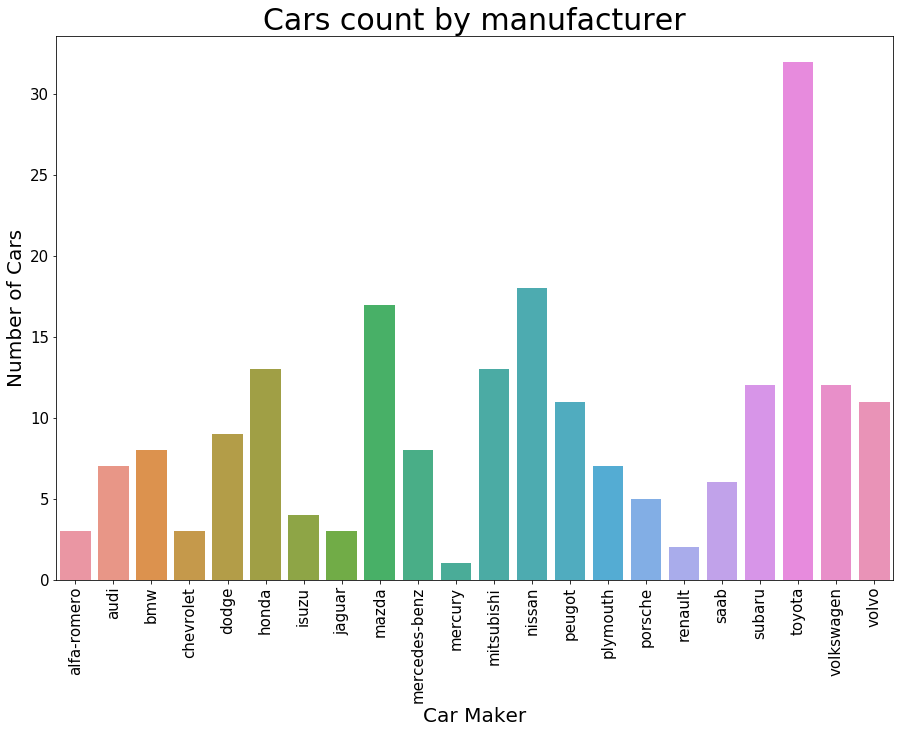

In [18]:
# Use matplotlib.pyplot and seaborn.countplot() method to get a simple count of vehicles by make
# See https://seaborn.pydata.org/generated/seaborn.countplot.html
#   countplot show the counts of observations in each categorical bin using bars.
# Note that you may get a font warning in some environments - you can ignore it
fig = plt.figure(figsize=(15, 10))
ax=sns.countplot(automobiles['make'])
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars count by manufacturer',fontsize=30)
ax.tick_params(labelsize=15)

<Figure size 432x288 with 0 Axes>

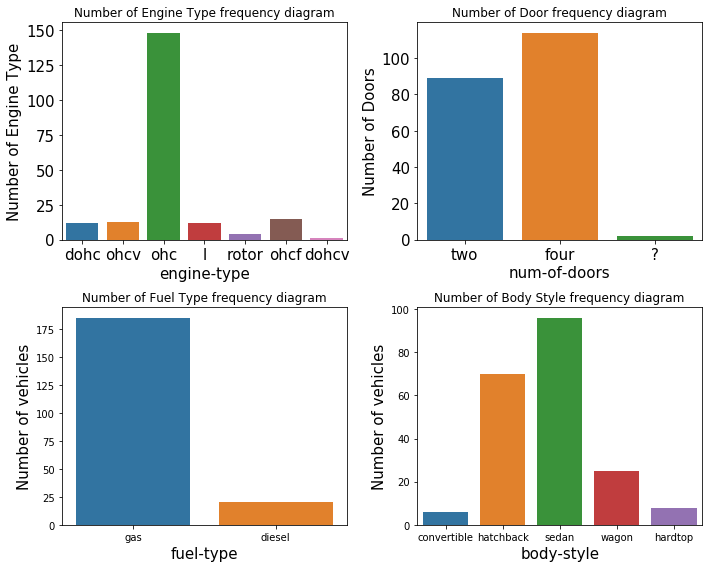

In [19]:
# Use matplotlib subplots to display 4 subplots on a single plot
plt.figure(1)
fig = plt.figure(figsize=(10, 8))
plt.subplot(221)
ax1=sns.countplot(automobiles['engine-type'])
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type',fontsize=15)
ax1.tick_params(labelsize=15)
plt.xlabel('engine-type',fontsize=15);


plt.subplot(222)
ax2=sns.countplot(automobiles['num-of-doors'])
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors',fontsize=15)
ax2.tick_params(labelsize=15)
plt.xlabel('num-of-doors',fontsize=15);

plt.subplot(223)
ax3=sns.countplot(automobiles['fuel-type'])
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('fuel-type',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplot(224)
ax4=sns.countplot(automobiles['body-style'])
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('body-style',fontsize=15);
plt.tight_layout()
plt.show()

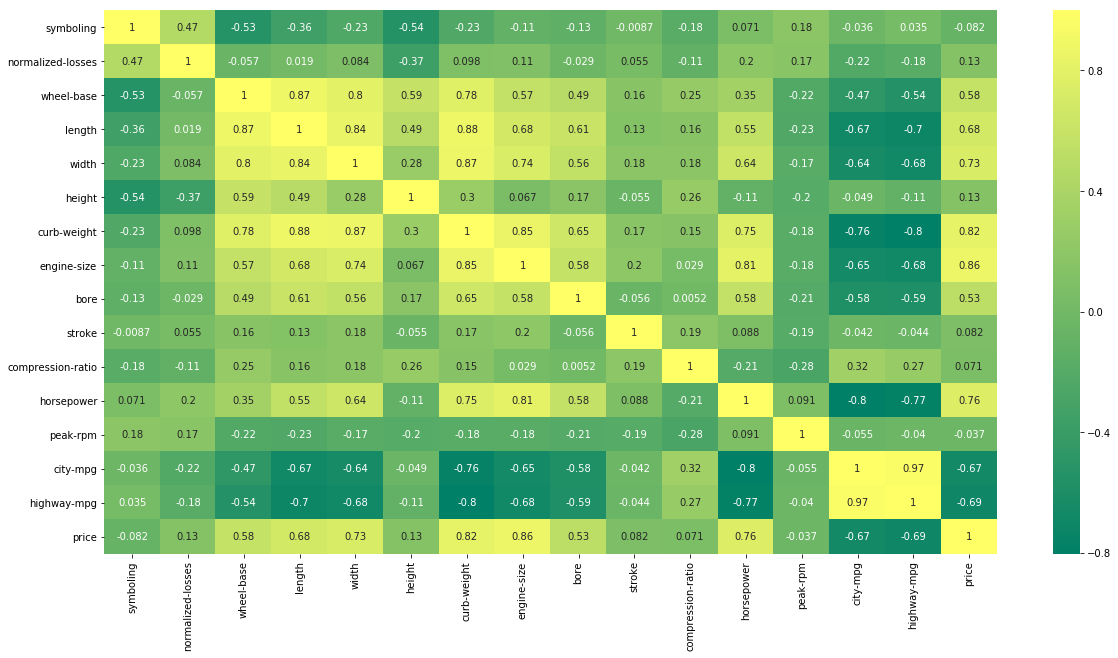

In [20]:
# Use matplotlib and seaborn to plot a heatmap
# the more yellow the squares, the more correlation there is between row and column,
# e.g. wheel-base and length are closely correlated (0.89)
# Similarly, curb-weight and highway-mpg have a high negative correlation (-0.8)
plt.figure(figsize=(20,10))
sns.heatmap(automobiles.corr(),annot=True,cmap='summer')

## More Data Cleanup
Convert text fields to numbers, which the algorithms can work better with

In [21]:
# Map two to 2, four to 4, and ? to 4 for num-of-doors
automobiles['num-of-doors']=automobiles['num-of-doors'].map({'two':2,'four':4,'?':4})
# Arbitrary mapping to numbers for other fields
automobiles['fuel-type']=automobiles['fuel-type'].map({'gas':1,'diesel':2})
automobiles['aspiration']=automobiles['aspiration'].map({'std':1,'turbo':2})
automobiles['body-style']=automobiles['body-style'].map({'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5})
automobiles['drive-wheels']=automobiles['drive-wheels'].map({'fwd':1,'rwd':2,'4wd':3})
automobiles['engine-location']=automobiles['engine-location'].map({'front':1,'rear':2})

In [22]:
# Add boolean (0/1) value columns for each value of fuel-system, make, engine-type, num-of-cylinders
for i in ['fuel-system','make','engine-type','num-of-cylinders']:
        i_dummy = pd.get_dummies(automobiles[i],prefix=i,prefix_sep = '_',drop_first=True)
        automobiles.drop([i],axis=1,inplace=True)
        automobiles= pd.concat([automobiles,i_dummy],axis=1)

In [23]:
# call info to see what columns are in dataframe now
# Note the extra columns that have been created for the individual values of fuel-system, make, engine-type, num-of-cylinders
automobiles.info()
automobiles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 63 columns):
symboling                  205 non-null int64
normalized-losses          205 non-null int32
fuel-type                  205 non-null int64
aspiration                 205 non-null int64
num-of-doors               205 non-null int64
body-style                 205 non-null int64
drive-wheels               205 non-null int64
engine-location            205 non-null int64
wheel-base                 205 non-null float64
length                     205 non-null float64
width                      205 non-null float64
height                     205 non-null float64
curb-weight                205 non-null int64
engine-size                205 non-null int64
bore                       205 non-null float64
stroke                     205 non-null float64
compression-ratio          205 non-null float64
horsepower                 205 non-null float64
peak-rpm                   205 non-null float64
cit

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
0,3,122,1,1,2,5,2,1,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
1,3,122,1,1,2,5,2,1,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
2,1,122,1,1,2,2,2,1,94.5,171.2,...,0,0,1,0,0,0,1,0,0,0
3,2,164,1,1,4,1,1,1,99.8,176.6,...,1,0,0,0,0,1,0,0,0,0
4,2,164,1,1,4,1,3,1,99.4,176.6,...,1,0,0,0,1,0,0,0,0,0


In [24]:
# export the cleaned data to a new csv file - we'll use this in the next workshop
automobiles.to_csv('automobiles_cleaned.csv')

## Run the AI algorithms on the cleansed data
Now that the data is finally cleaned up, let's run the AI algorithms.

A few key concepts here:
* We have a single source dataset of automobile data
* Our goal is to predict the price of a vehicle based on the other input data
* To do this, we do the following steps:
 * We split the data into training and test datasets
 * Then we fit the model to the training data
 * Then we use the model to predict the price for the test dataset
 * Finally, we measure the prediction results to get a value for the accuracy of the model
 
Don't worry if you don't understand everything below. We'll cover more of this in the next workshop.

In [25]:
# split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

x= automobiles.drop('price',axis=1)
y= automobiles['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [26]:
# Use a decision tree regressor to make a prediction on the test dataset
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2,random_state=101)
dtr.fit(x_train,y_train)
dtr_prediction = dtr.predict(x_test)
dtr_prediction

ValueError: could not convert string to float: 'Ordinary'

Measuring Errors - compares the price that the model predicted v. the real price
* Mean Absolute Error (MAE): it takes the average error.
* Mean Squared Error (MSE): is more popular than MAE,because MSE "punishes" large errors,which tends to be useful in real world.
* Root Mean Squared Error (RMSE): is even more popular than MSE,because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [ ]:
metrics.mean_absolute_error(y_test, dtr_prediction)
print("DTR Mean Absolute Error: ", metrics.mean_absolute_error(y_test,dtr_prediction))
print("DTR Mean Squared Error: ", metrics.mean_squared_error(y_test,dtr_prediction))
print("DTR Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test,dtr_prediction)))

In [ ]:
# Use RandomForestRegressor to fit the model to the training data
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500, max_depth=2,random_state=101)
# call fit to train the model
rfr.fit(x_train,y_train)

In [ ]:
# Now, use the model to predict the price value for the test dataset
rfr_prediction = rfr.predict(x_test)

In [ ]:
rfr_prediction

In [ ]:
# Let's see how the model performed
print("RFR Mean Absolute Error: ", metrics.mean_absolute_error(y_test,rfr_prediction))
print("RFR Mean Squared Error: ", metrics.mean_squared_error(y_test,rfr_prediction))
print("RFR Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test,rfr_prediction)))

Have a look into other Algorithoms and try them to get a better performing Model.Try Atleas 2 different Algorithms and
check the performance.


In [ ]:
#Algorithm 1


In [ ]:
#Algorithm 2


# References and Background Reading
* [Pandas Data Structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)
